In [2]:
import pandas as pd
import glob
import os
import random
import numpy as np
import cv2


In [3]:
df=pd.read_csv("../Data/data.csv")
df.head()

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   
2                        2.0                1.0         1.0             2.0   
3                        1.0                1.0         3.0             6.0   
4                        2.0                1.0         1.0             6.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0  
2     2.0                       37.0   3.0        NaN      0.0  
3     2.0                       50.0   3.0        NaN      0.0  
4     2.0                       39.0   3.0        NaN      0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [4]:
data_map = []

for sub_dir_path in glob.glob("/workspaces/Projet_RGD/Data/kaggle_3m/*"):
    try:
        dir_name = os.path.basename(sub_dir_path)
        for filename in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path, filename)
            data_map.append([dir_name, image_path])
    except Exception as e:
        print(e)

In [5]:
df1 = pd.DataFrame(data_map, columns=["patient_id", "image_path"])
df1.head()

patient_id                                         image_path
0  TCGA_CS_6665_20010817  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_CS_...
1  TCGA_CS_6665_20010817  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_CS_...
2  TCGA_CS_6665_20010817  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_CS_...
3  TCGA_CS_6665_20010817  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_CS_...
4  TCGA_CS_6665_20010817  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_CS_...

In [6]:
df_imgs = df1[~df1['image_path'].str.contains("mask")]
df_masks = df1[df1['image_path'].str.contains("mask")]

# extraction dfu numéro de l'image 
BASE_LEN = 76 # index ou commence le numéro
END_IMG_LEN = 4 # nombre de chaines de caractères à éliminer de la fin du chemin de l'image
END_MASK_LEN = 9 # nombre de chaines de caractères à éliminer de la fin du chemin du mask

# trier les images et masks selon leur numéros
imgs = sorted(df_imgs["image_path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["image_path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))

#vérification 
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx], "\nPath to the Mask:", masks[idx])

Path to the Image: /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_34.tif 
Path to the Mask: /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_34_mask.tif


# Creation de la data finale 

In [7]:
df_final = pd.DataFrame({
    "patient_id": df_imgs.patient_id.values,
    "image_path": imgs,
    "mask_path": masks
})

def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : 
        return 1
    else:
        return 0

In [8]:
df_final['mask'] = df_final['mask_path'].apply(lambda x: pos_neg_diagnosis(x))

In [9]:
df_final

patient_id  \
0     TCGA_CS_6665_20010817   
1     TCGA_CS_6665_20010817   
2     TCGA_CS_6665_20010817   
3     TCGA_CS_6665_20010817   
4     TCGA_CS_6665_20010817   
...                     ...   
3924  TCGA_DU_7014_19860618   
3925  TCGA_DU_7014_19860618   
3926  TCGA_DU_7014_19860618   
3927  TCGA_DU_7014_19860618   
3928  TCGA_DU_7014_19860618   

                                             image_path  \
0     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
1     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
2     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
3     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
4     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
...                                                 ...   
3924  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
3925  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
3926  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
3927  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   
3928  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...   

                                              mask_path  mask  
0     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
1     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
2     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
3     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
4     /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
...                                                 ...   ...  
3924  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
3925  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
3926  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
3927  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  
3928  /workspaces/Projet_RGD/Data/kaggle_3m/TCGA_HT_...     0  

[3929 rows x 4 columns]

In [12]:
df_final["mask"].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

## Data Visualisation

In [13]:
import plotly.graph_objects as go  

fig = go.Figure([go.Bar(x=df_final['mask'].value_counts().index, 
                        y=df_final['mask'].value_counts(), 
                        width=[.4, .4]
                       )
                ])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=4, opacity=0.4
                 )
fig.update_layout(title_text="Graphique du nombre des masks",
                  width=700,
                  height=550,
                  yaxis=dict(
                             title_text="Count",
                             tickmode="array",
                             titlefont=dict(size=20)
                           )
                 )
fig.update_yaxes(automargin=True)
fig.show()


In [14]:
import matplotlib.pyplot as plt


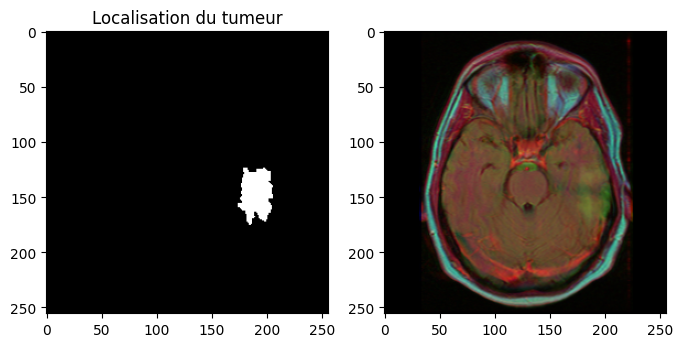

In [15]:
for i in range(len(df_final)):
    if cv2.imread(df_final.mask_path[i]).max() > 0:
        break

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(df_final.mask_path[i]));
plt.title('Localisation du tumeur')

plt.subplot(1,2,2)
plt.imshow(cv2.imread(df_final.image_path[i]));

In [16]:
cv2.imread(df_final.mask_path[i]).max(), cv2.imread(df_final.mask_path[i]).min()

(255, 0)

Les valeurs min=0 et max=255 indiquent que le masque est binaire et contient bien une région annotée. La présence de la valeur 255 confirme l’existence d’une zone tumorale sur cette image.

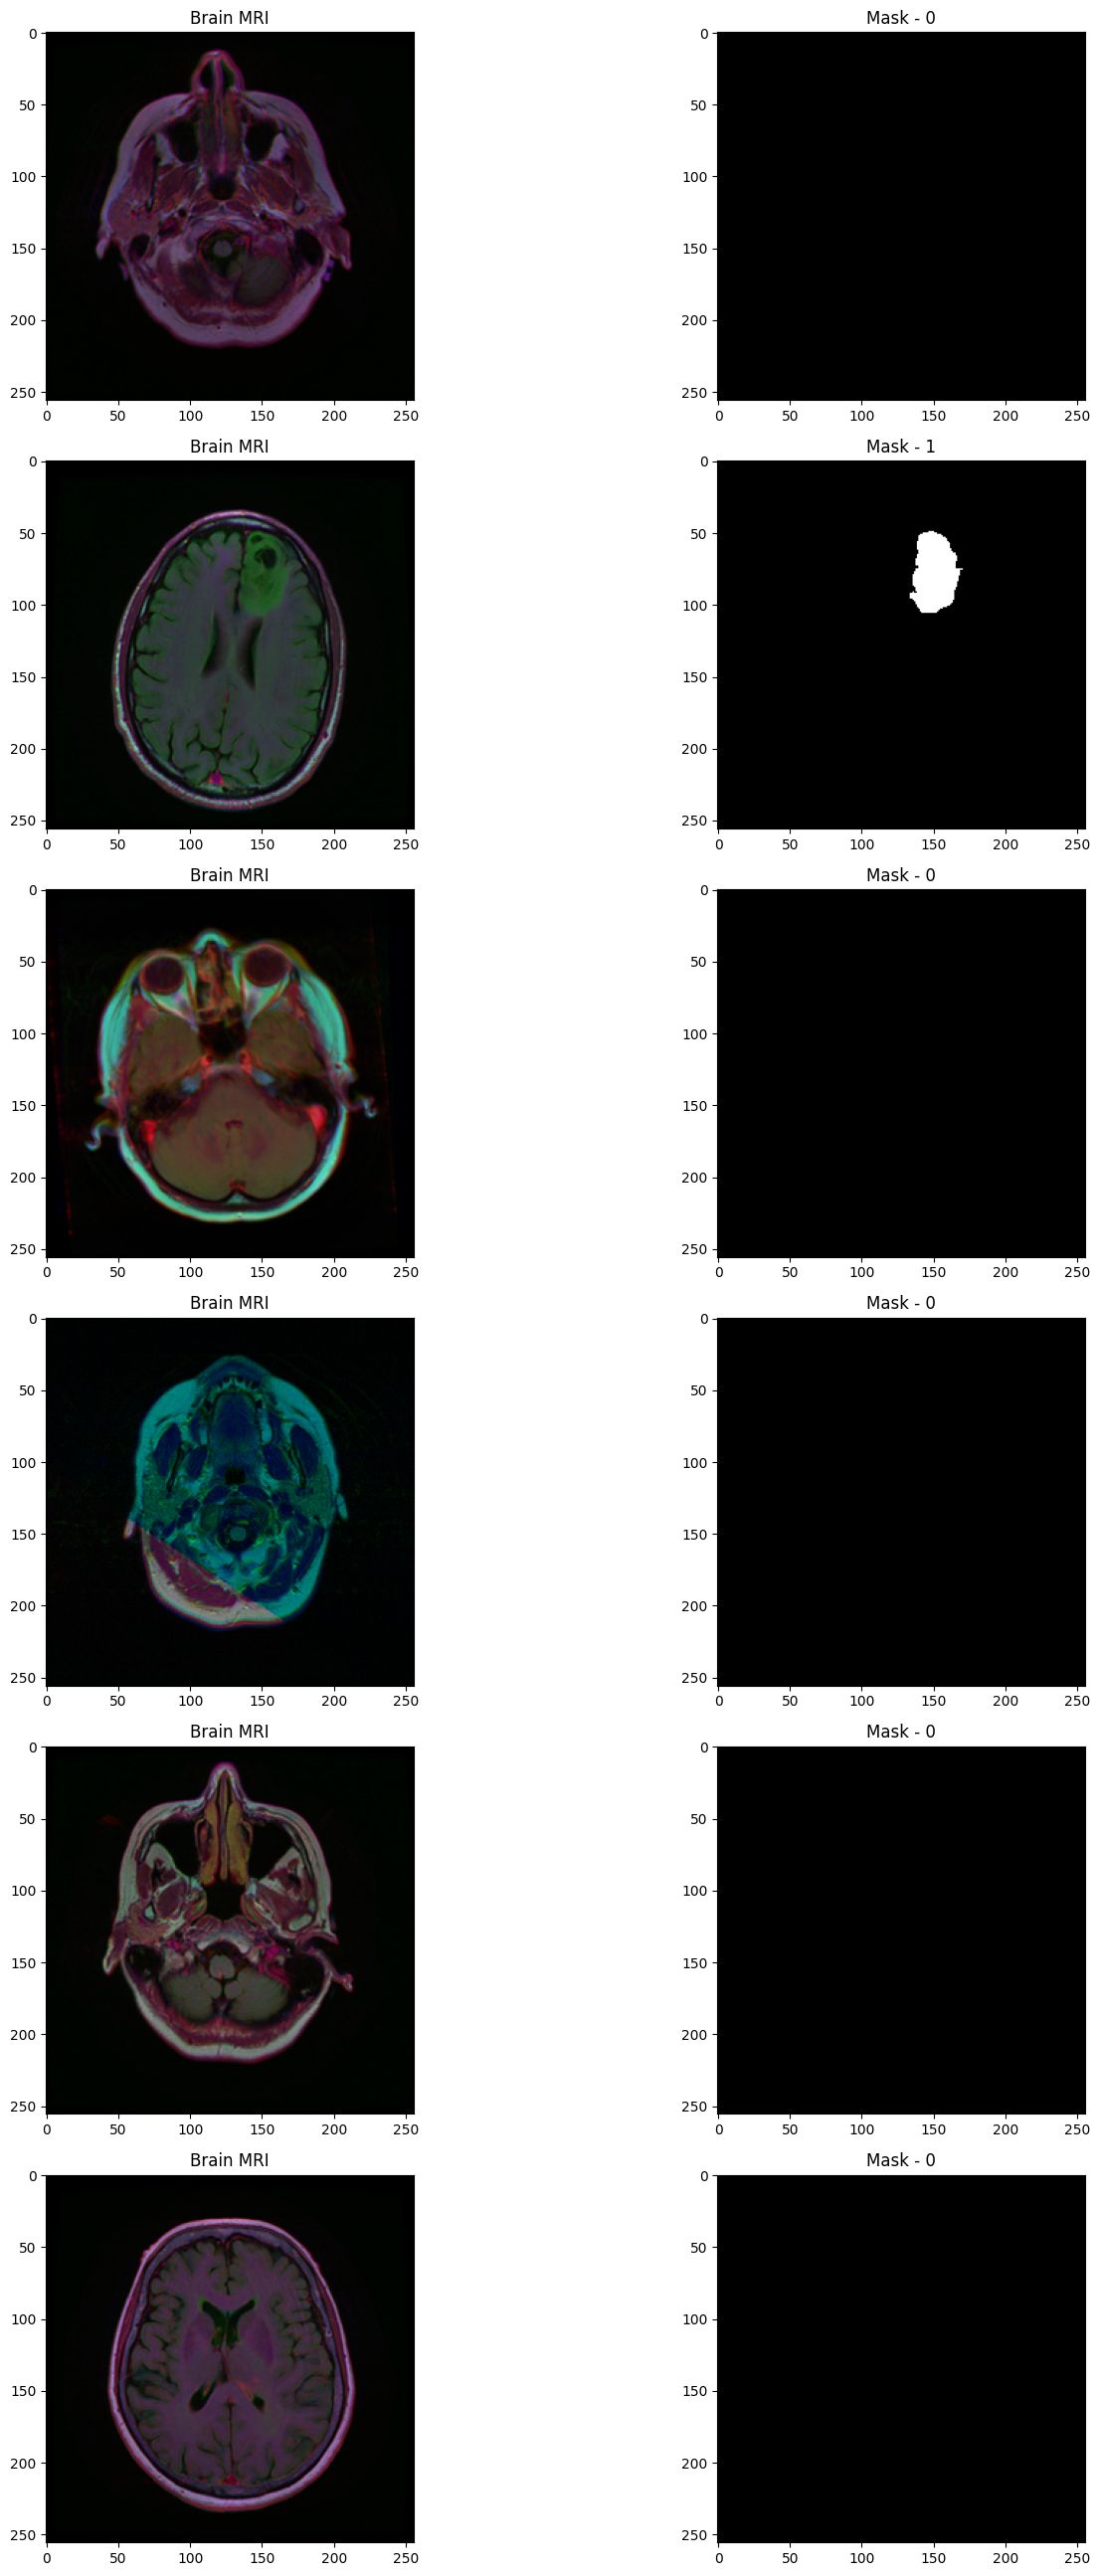

In [17]:
# Visualisations de base : afficher séparément les images (IRM et masques) du dataset
fig, axs = plt.subplots(6,2, figsize=(16,26))
count = 0
for x in range(6):
  i = random.randint(0, len(df_final)) 
  axs[count][0].title.set_text("Brain MRI") 
  axs[count][0].imshow(cv2.imread(df_final.image_path[i])) 
  axs[count][1].title.set_text("Mask - " + str(df_final['mask'][i])) 
  axs[count][1].imshow(cv2.imread(df_final.mask_path[i])) 
  count += 1

fig.tight_layout()

# Affichage des images cérébrales (IRM) et superposition des masques de tumeur

In [18]:
import cv2

img = cv2.imread(df_final.image_path[i])
mask = cv2.imread(df_final.mask_path[i], cv2.IMREAD_GRAYSCALE)  # masque en niveau de gris


In [19]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


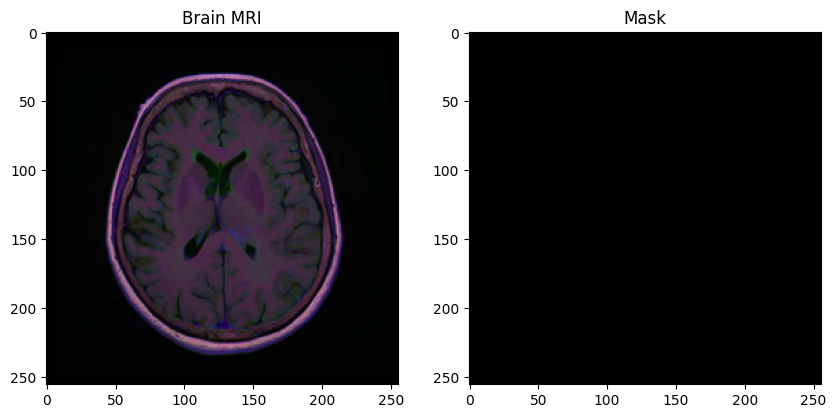

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Brain MRI")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")

plt.show()


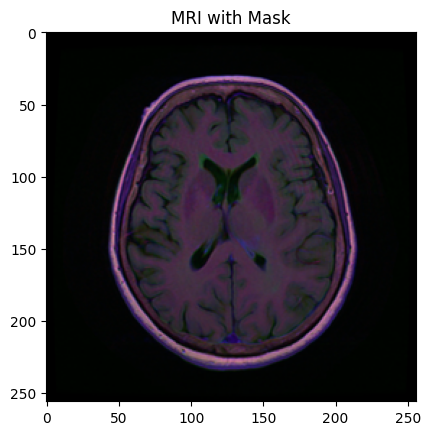

In [21]:
img_overlay = img_rgb.copy()

img_overlay[mask==255] = (0,255,150)

plt.imshow(img_overlay)
plt.title("MRI with Mask")
plt.show()


# Split des données

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import *

2025-12-12 02:18:21.790369: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 02:18:21.921206: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 02:18:23.106793: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 02:18:23.109871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-12 02:18:25.679439: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [11]:
df_final = df_final.drop(columns=['patient_id'])
df_final['mask'] = df_final['mask'].apply(lambda x: str(x))

In [12]:
df_train, df_test = train_test_split(df_final, test_size = 0.1, random_state = 42)
df_train, df_val = train_test_split(df_train, test_size = 0.1, random_state = 42)
print('train data shape: ', df_train.values.shape)
print('val data shape:   ', df_val.values.shape)
print('test data shape:  ', df_test.values.shape)

train data shape:  (3182, 3)
val data shape:    (354, 3)
test data shape:   (393, 3)


# Augmentation des données 

In [13]:
# Data augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Pas d'augmentation pour validation et test, juste normalisation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image_path',  
    y_col='mask',       
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

# Générateur de validation
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image_path',
    y_col='mask',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# Générateur de test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='mask',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


Found 3182 validated image filenames belonging to 2 classes.
Found 354 validated image filenames belonging to 2 classes.
Found 393 validated image filenames belonging to 2 classes.


# Modèle CNN pour la classification des tumeurs

## Initialisation du modéle

In [14]:
from tensorflow.keras import layers, models
# CNN pour classification binaire d'images 256x256x3 : 3 blocs Conv2D 
# + MaxPooling pour extraire des caractéristiques 
# + Flatten pour vectoriser 
# + Dense(128) pour combiner les features
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

## Entrainement du modèle

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

Epoch 1/20
199/199 [==============================] - 185s 919ms/step - loss: 0.5814 - accuracy: 0.6933 - val_loss: 0.4840 - val_accuracy: 0.7627
Epoch 2/20
199/199 [==============================] - 216s 1s/step - loss: 0.4544 - accuracy: 0.7687 - val_loss: 0.3926 - val_accuracy: 0.7825
Epoch 3/20
199/199 [==============================] - 213s 1s/step - loss: 0.4164 - accuracy: 0.7907 - val_loss: 0.3393 - val_accuracy: 0.8390
Epoch 4/20
199/199 [==============================] - 192s 965ms/step - loss: 0.3892 - accuracy: 0.8114 - val_loss: 0.3395 - val_accuracy: 0.8136
Epoch 5/20
199/199 [==============================] - 210s 1s/step - loss: 0.3739 - accuracy: 0.8209 - val_loss: 0.3214 - val_accuracy: 0.8588
Epoch 6/20
199/199 [==============================] - 227s 1s/step - loss: 0.3408 - accuracy: 0.8375 - val_loss: 0.2868 - val_accuracy: 0.8729
Epoch 7/20
199/199 [==============================] - 227s 1s/step - loss: 0.3198 - accuracy: 0.8539 - val_loss: 0.2909 - val_accuracy: 

## Evaluation des performances du modèle

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

25/25 [==============================] - 6s 252ms/step - loss: 0.2878 - accuracy: 0.8855
Test Accuracy: 0.885496199131012
Test Loss: 0.28781241178512573


In [17]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.labels

25/25 [==============================] - 6s 251ms/step


In [18]:
y_true = test_generator.labels  

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC:", roc_auc_score(y_true, y_pred_prob))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8854961832061069
Precision: 0.9693877551020408
Recall: 0.6934306569343066
F1 Score: 0.8085106382978723
AUC: 0.9622205748175182
Confusion Matrix:
 [[253   3]
 [ 42  95]]


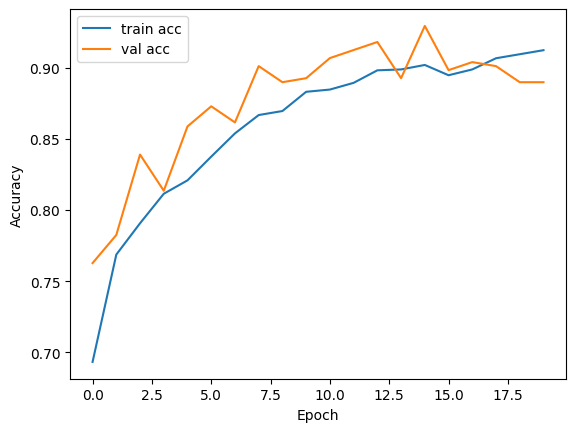

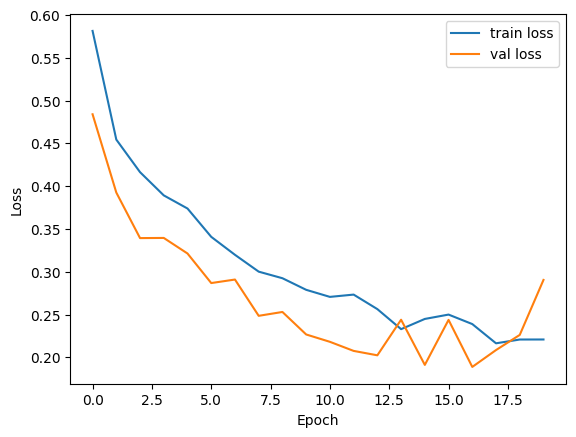

In [20]:
import matplotlib.pyplot as plt

# Tracé de l'évolution de l'accuracy pendant l'entraînement
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracé de l'évolution de la loss pendant l'entraînement
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
